# Data Sience Project - Task 2  

In [2]:
import pandas as pd
import numpy as np

In [3]:
#load the csv and show
df = pd.read_csv('Hotels_data_Changed.csv', parse_dates=True)
df.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,Wednesday,138,11.714771
1,1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,Wednesday,131,11.769991
2,2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,27,Thursday,130,2.974828
3,3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,Sunday,72,4.140311
4,4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,Wednesday,67,3.852789


## 2.a

#### groupby to organize the details

In [4]:
grouped_df = df.groupby(['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay'])

In [5]:
grouped_df['DiscountDiff'].max()

Snapshot Date  Checkin Date  DayDiff  Hotel Name                                                    WeekDay  
2015-07-17     2015-07-18    1        Home2 Suites by Hilton NY Long Island City Manhattan View     Saturday     150
                                      Howard Johnson Inn Queens                                     Saturday      33
                                      Newark Liberty International Airport Marriott                 Saturday     180
                                      Park Hyatt New York                                           Saturday     100
                                      Ramada Staten Island                                          Saturday     150
                                      Renaissance Newark Airport Hotel                              Saturday     200
               2015-07-19    2        Hampton Inn JFK Airport                                       Sunday       120
                                      Hilton New York JFK Airport      

##### Because the groupby first one, does according to the date of the Snapshot Date its hard to understand and use for chack.
##### lets try other options maybe more easier.

#### filter to the dataframe that only the columns that help us to find the max discount

In [6]:
filtered = df.filter(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay", "DiscountDiff", "Discount Code"], axis=1)
filtered.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,DiscountDiff,Discount Code
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,138,1
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,131,1
2,The Peninsula New York,27,2015-08-13,2015-07-17,Thursday,130,1
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,72,1
4,Eventi Hotel a Kimpton Hotel,26,2015-08-12,2015-07-17,Wednesday,67,1


#### now we try again to do group by with a different order

In [7]:
filtered["MaxDiscount"] = filtered.groupby(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"])["DiscountDiff"].transform('max')

In [8]:
filtered.head(15)

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,DiscountDiff,Discount Code,MaxDiscount
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,138,1,138
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,131,1,131
2,The Peninsula New York,27,2015-08-13,2015-07-17,Thursday,130,1,230
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,72,1,72
4,Eventi Hotel a Kimpton Hotel,26,2015-08-12,2015-07-17,Wednesday,67,1,141
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,91,1,91
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,91,1,91
7,Grand Hyatt New York,26,2015-08-12,2015-07-17,Wednesday,73,1,73
8,Grand Hyatt New York,27,2015-08-13,2015-07-17,Thursday,55,1,127
9,Hilton New York Fashion District,5,2015-07-22,2015-07-17,Wednesday,200,1,200


In [9]:
#we have a duplicates values , we need the values be currect ,so we need remove them from the table
grouped = filtered[filtered["DiscountDiff"]==filtered["MaxDiscount"]].drop_duplicates(["Hotel Name","DayDiff", "Checkin Date", "Snapshot Date", "WeekDay"])
grouped.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,DiscountDiff,Discount Code,MaxDiscount
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,138,1,138
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,131,1,131
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,72,1,72
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,91,1,91
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,91,1,91


In [10]:
#now we need to remove the columns thats halpes us , from now we use only in discount code(class)
grouped.drop(labels=["MaxDiscount","DiscountDiff"], axis=1,inplace=True)
grouped.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,1
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,1
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,1
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,1
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,1


#### Save df to csv

In [11]:
grouped.to_csv("Hotels_data_best_discount.csv")

## 2.b

In [12]:
new_df=grouped.copy()

In [13]:
#check if is the same.
new_df.head()

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code
0,Best Western Plus Seaport Inn Downtown,26,2015-08-12,2015-07-17,Wednesday,1
1,Best Western Plus Seaport Inn Downtown,33,2015-08-19,2015-07-17,Wednesday,1
3,Eventi Hotel a Kimpton Hotel,9,2015-07-26,2015-07-17,Sunday,1
5,Grand Hyatt New York,21,2015-08-07,2015-07-17,Friday,1
6,Grand Hyatt New York,23,2015-08-09,2015-07-17,Sunday,1


## pre process

In [14]:
from sklearn.preprocessing import LabelEncoder

#### for fit will work - convert columns to categorial numbers instead of strings

In [15]:
lb_make = LabelEncoder()
new_df["Snapshot Date"] = lb_make.fit_transform(new_df["Snapshot Date"])
new_df["Checkin Date"] = lb_make.fit_transform(new_df["Checkin Date"])
new_df["Hotel Name"] = lb_make.fit_transform(new_df["Hotel Name"])
new_df["WeekDay"] = lb_make.fit_transform(new_df["WeekDay"])
new_df=new_df[['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay','Discount Code']].dropna(axis=0, how='any')

In [16]:
new_df.head()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay,Discount Code
0,0,25,26,35,6,1
1,0,32,33,35,6,1
3,0,8,9,127,3,1
5,0,20,21,163,0,1
6,0,22,23,163,3,1


In [17]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

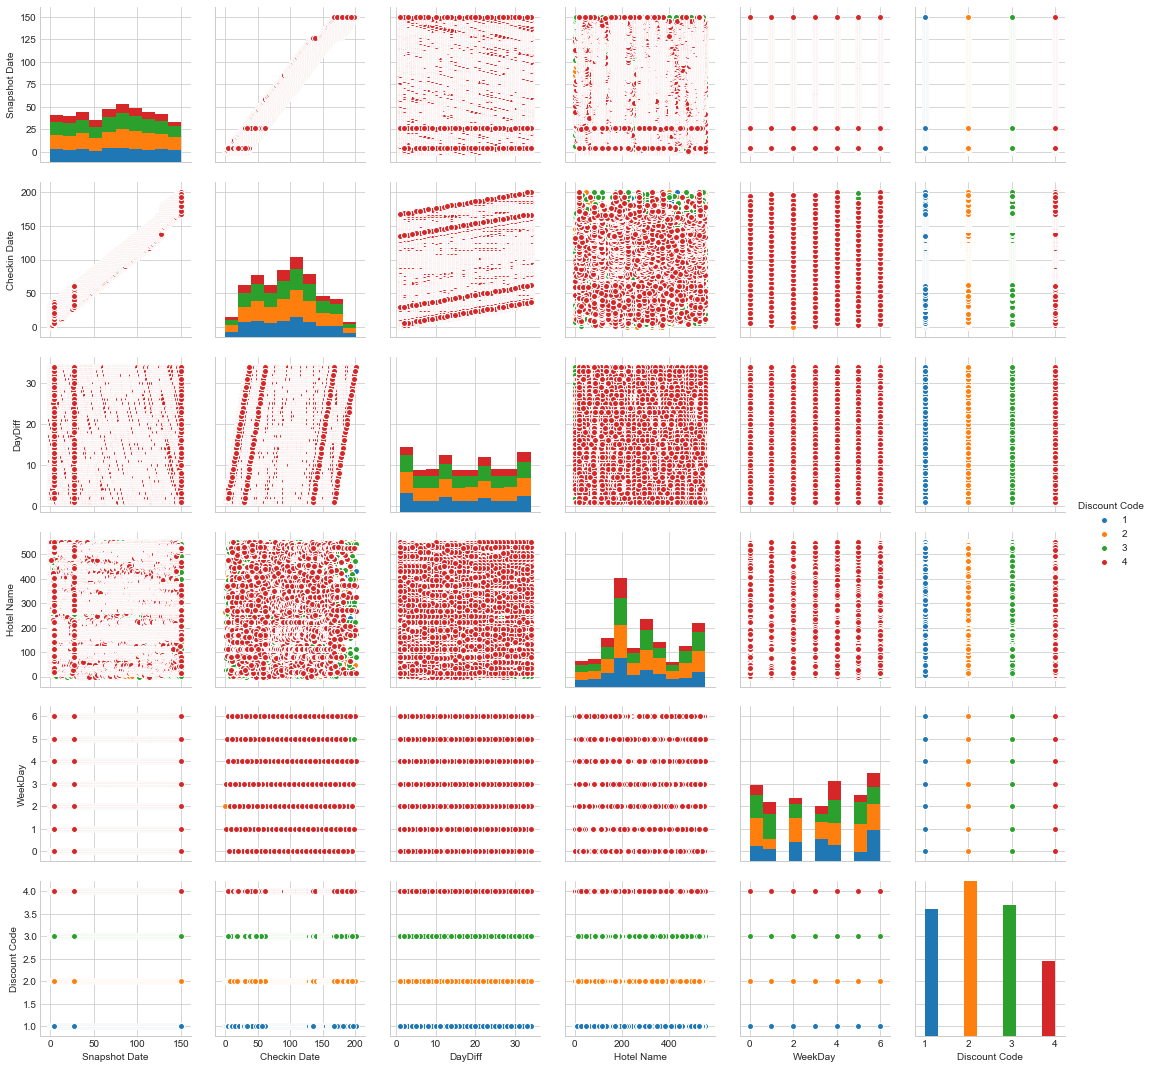

In [18]:
sns.pairplot(new_df,hue='Discount Code')

## split train and test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Split dataset in training and test datasets
used_features =['Snapshot Date','Checkin Date','DayDiff','Hotel Name','WeekDay']
features = new_df[used_features]
classes = new_df['Discount Code']
X_train, X_test, Y_train, Y_test = train_test_split(features,classes, test_size=0.3)

## Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [22]:
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train,
    Y_train
)

GaussianNB(priors=None)

#### accuracy:

In [23]:
expected = Y_test
predicted = gnb.predict(X_test)
accuracy_score(expected,predicted)

0.31242621932277104

#### confusion matrix and reports:

In [24]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       0.30      0.09      0.14      8379
          2       0.31      0.75      0.44     10156
          3       0.31      0.20      0.24      8657
          4       0.00      0.00      0.00      4998

avg / total       0.26      0.31      0.24     32190

[[ 751 6540 1088    0]
 [ 768 7579 1809    0]
 [ 545 6385 1727    0]
 [ 409 3719  870    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

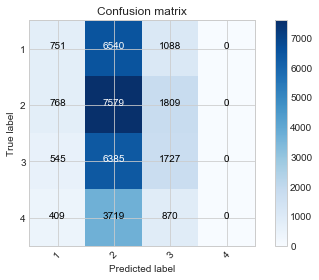

In [26]:
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted), classes.unique(),
                       title='Confusion matrix')

In [27]:
gnb.predict([[0,25,26,35,6]])[0]

1

## An attempt to improve the accuracy

#### lets see what will happen if we remove one or more featers (we tried all the Variations) , will it improve the accuracy?

In [28]:
# Split dataset again in training and test datasets without dayDiff
used_features1 =['Snapshot Date','Checkin Date','Hotel Name','WeekDay']
features1 = new_df[used_features1]
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(features1,classes, test_size=0.3)

In [29]:
from sklearn.naive_bayes import GaussianNB
# Instantiate the classifier
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train1,
    Y_train1
)

GaussianNB(priors=None)

#### The accuracy hasn't improved :

In [30]:
expected1 = Y_test1
predicted1 = gnb.predict(X_test1)
accuracy_score(expected1,predicted1)

0.3122708915812364

#### In order to balance the classes observations amount we will take the same amount of rows for each class

In [31]:
C1=new_df[new_df['Discount Code']==1].count()
C2=new_df[new_df['Discount Code']==2].count()
C3=new_df[new_df['Discount Code']==3].count()
C4=new_df[new_df['Discount Code']==4].count()
print("c1:",C1)
print("c2:",C2)
print("c3:",C3)
print("c4:",C4)

c1: Snapshot Date    27899
Checkin Date     27899
DayDiff          27899
Hotel Name       27899
WeekDay          27899
Discount Code    27899
dtype: int64
c2: Snapshot Date    34040
Checkin Date     34040
DayDiff          34040
Hotel Name       34040
WeekDay          34040
Discount Code    34040
dtype: int64
c3: Snapshot Date    28835
Checkin Date     28835
DayDiff          28835
Hotel Name       28835
WeekDay          28835
Discount Code    28835
dtype: int64
c4: Snapshot Date    16525
Checkin Date     16525
DayDiff          16525
Hotel Name       16525
WeekDay          16525
Discount Code    16525
dtype: int64


In [32]:
# 16525 is the min number of rows in all the classes
Class1=new_df[new_df['Discount Code']==1].head(16525)
Class2=new_df[new_df['Discount Code']==2].head(16525)
Class3=new_df[new_df['Discount Code']==3].head(16525)
Class4=new_df[new_df['Discount Code']==4].head(16525)

In [33]:
Class1=Class1.append(Class2)
Class1=Class1.append(Class3)
Class1=Class1.append(Class4)

In [34]:
Class1.tail()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay,Discount Code
187837,27,51,23,314,1,4
187841,27,40,12,47,4,4
187844,27,48,20,445,0,4
187845,27,33,5,273,4,4
187846,27,46,18,273,6,4


In [35]:
df_same=Class1.copy();

In [36]:
df_same.drop(labels=["Discount Code"],axis=1, inplace=True)

In [37]:
df_same.head()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay
0,0,25,26,35,6
1,0,32,33,35,6
3,0,8,9,127,3
5,0,20,21,163,0
6,0,22,23,163,3


In [38]:
df_same.describe()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay
count,66100.000000,66100.000000,66100.000000,66100.000000,66100.000000
mean,57.621180,77.987216,17.764539,279.912890,3.151740
std,32.115027,36.021168,9.921202,147.022605,2.078018
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,34.000000,51.000000,9.000000,173.000000,1.000000
50%,59.000000,79.000000,18.000000,272.000000,3.000000
75%,80.000000,103.000000,26.000000,387.000000,5.000000
max,150.000000,201.000000,34.000000,553.000000,6.000000


#### we can see here that mean is approxmetly  as median (50%) so its probably noraml distribution

In [39]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_same, Class1['Discount Code'], test_size=0.3,random_state=0) 

In [40]:
X_train2, X_test2, y_train2, y_test2

(        Snapshot Date  Checkin Date  DayDiff  Hotel Name  WeekDay
 138069            117           155       33         113        3
 49737              13            28       16         514        2
 185607              4            30       27         408        1
 54401              60            92       30         176        3
 28511              46            71       23         111        3
 86925              82            95        9         194        6
 45173              11            44       34          86        1
 103533             93           107       10         351        1
 22595              42            53       10         188        6
 106585             96           121       21         397        1
 134465            114           134       15         191        3
 20566              41            43        1         180        3
 13480              36            66       29         420        5
 90821              85           107       18         141     

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train2, y_train2)
pred = gnb.predict(X_test2)

In [42]:
accuracy_score(y_test2,pred)

0.33530005042864347

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test2,pred))
print(metrics.confusion_matrix(y_test2,pred))

             precision    recall  f1-score   support

          1       0.27      0.14      0.18      4925
          2       0.29      0.56      0.38      4917
          3       0.31      0.21      0.25      4938
          4       0.48      0.43      0.45      5050

avg / total       0.34      0.34      0.32     19830

[[ 680 2449  741 1055]
 [ 745 2757 1053  362]
 [ 613 2367 1044  914]
 [ 466 1888  528 2168]]


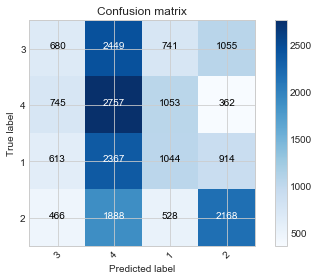

In [44]:
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(y_test2,pred), y_test2.unique(),
                       title='Confusion matrix')

In [45]:
gnb.predict([[0,25,26,35,6]])[0]

2

In [46]:
cm=metrics.confusion_matrix(y_test2,pred)

FP = cm.sum(axis=0) - np.diag(cm)  # foreach class: sum prediction - TP
FN = cm.sum(axis=1) - np.diag(cm)  # foreach class: sum actuals - TP
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

def printRates(array, stat):
    print("%s for classes:" %stat)
    for i in range(len(array)):
        print("\tclass %d = %f" %(i+1, array[i]))
    print("")
    
printRates(FP, "FP")
printRates(FN, "FN")
printRates(TP, "TP")
printRates(TN, "TN")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
printRates(TPR, "TPR")

# Specificity or true negative rate
TNR = TN/(TN+FP) 
printRates(TNR, "TNR")

# Precision or positive predictive value
PPV = TP/(TP+FP)
printRates(PPV, "PPV")

# Negative predictive value
NPV = TN/(TN+FN)
printRates(NPV, "NPV")

# Fall out or false positive rate
FPR = FP/(FP+TN)
printRates(FPR, "FPR")

# False negative rate
FNR = FN/(TP+FN)
printRates(FNR, "FNR")

# False discovery rate
FDR = FP/(TP+FP)
printRates(FDR, "FDR")

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
printRates(ACC, "ACC")

FP for classes:
	class 1 = 1824.000000
	class 2 = 6704.000000
	class 3 = 2322.000000
	class 4 = 2331.000000

FN for classes:
	class 1 = 4245.000000
	class 2 = 2160.000000
	class 3 = 3894.000000
	class 4 = 2882.000000

TP for classes:
	class 1 = 680.000000
	class 2 = 2757.000000
	class 3 = 1044.000000
	class 4 = 2168.000000

TN for classes:
	class 1 = 13081.000000
	class 2 = 8209.000000
	class 3 = 12570.000000
	class 4 = 12449.000000

TPR for classes:
	class 1 = 0.138071
	class 2 = 0.560708
	class 3 = 0.211422
	class 4 = 0.429307

TNR for classes:
	class 1 = 0.877625
	class 2 = 0.550459
	class 3 = 0.844077
	class 4 = 0.842287

PPV for classes:
	class 1 = 0.271565
	class 2 = 0.291407
	class 3 = 0.310160
	class 4 = 0.481885

NPV for classes:
	class 1 = 0.754992
	class 2 = 0.791687
	class 3 = 0.763484
	class 4 = 0.812015

FPR for classes:
	class 1 = 0.122375
	class 2 = 0.449541
	class 3 = 0.155923
	class 4 = 0.157713

FNR for classes:
	class 1 = 0.861929
	class 2 = 0.439292
	class 3 = 0.78

# PCA

In [47]:
from sklearn import preprocessing

In [48]:
# center and scale the data
# after centering the avarage value for each will be 0 and the standard daviation 1
# we pass transpose of the features
scaled_data = preprocessing.scale(features.T)

In [49]:
from sklearn.decomposition import PCA

In [50]:
pca = PCA()

In [51]:
# fitting (claculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
# generate coordinates for the graph based on the calculated scores and variations
pca_data = pca.transform(scaled_data)

In [53]:
import numpy as np
import matplotlib.pyplot as plt

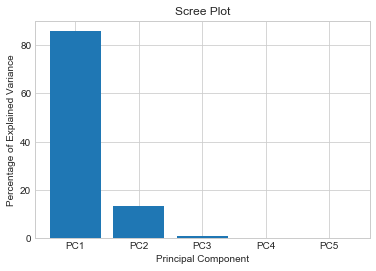

In [54]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

#### Plot PCA Graph 

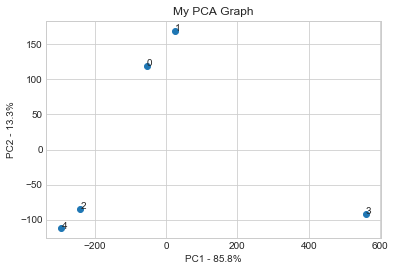

In [55]:
# almost all variation is at PC1 so 2D graph should explain well the data
pca_df = pd.DataFrame(pca_data, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

#### we can see that features 2 and 4 are close and also closer to 0 and 1 than 3 which is not correlated to those

In [56]:
features.head()

,Snapshot Date,Checkin Date,DayDiff,Hotel Name,WeekDay
0,0,25,26,35,6
1,0,32,33,35,6
3,0,8,9,127,3
5,0,20,21,163,0
6,0,22,23,163,3


### Try to classify without the 0 and 2 indexed features (as they seem correlated to 1 and 4 indexed features in pairs)

#### On the first processed dataframe

In [57]:
# Split dataset again in training and test datasets without Snapshot Date and dayDiff
used_features3 =['Checkin Date','Hotel Name','WeekDay']
features3 = new_df[used_features3]
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(features3,classes, test_size=0.3)
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train3,
    Y_train3
)
expected = Y_test3
predicted = gnb.predict(X_test3)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       0.29      0.03      0.06      8347
          2       0.31      0.79      0.44     10168
          3       0.31      0.19      0.24      8777
          4       0.00      0.00      0.00      4898

avg / total       0.26      0.31      0.22     32190

[[ 276 6962 1109    0]
 [ 306 8003 1859    0]
 [ 223 6867 1687    0]
 [ 135 4005  758    0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### On the balanced features data

In [58]:
# Split dataset again in training and test datasets without Snapshot Date and dayDiff
used_features4 =['Checkin Date','Hotel Name','WeekDay']
features4 = df_same[used_features3]
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(features4, Class1['Discount Code'], test_size=0.3,random_state=0) 
gnb = GaussianNB()
# Train classifier
gnb.fit(
    X_train4,
    Y_train4
)
expected = Y_test4
predicted = gnb.predict(X_test4)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       0.28      0.20      0.23      4925
          2       0.29      0.41      0.34      4917
          3       0.33      0.34      0.33      4938
          4       0.49      0.41      0.45      5050

avg / total       0.35      0.34      0.34     19830

[[ 989 1897 1105  934]
 [1016 2029 1445  427]
 [ 853 1642 1664  779]
 [ 731 1341  892 2086]]


## Test performance with randomized data and balanced

In [59]:
# 16525 is the min number of rows in all the classes
Class1=new_df[new_df['Discount Code']==1].sample(16525)
Class2=new_df[new_df['Discount Code']==2].sample(16525)
Class3=new_df[new_df['Discount Code']==3].sample(16525)
Class4=new_df[new_df['Discount Code']==4].sample(16525)

Class1=Class1.append(Class2)
Class1=Class1.append(Class3)
Class1=Class1.append(Class4)

df_same=Class1.copy();

df_same.drop(labels=["Discount Code"],axis=1, inplace=True)

X_train5, X_test5, y_train5, y_test5 = train_test_split(df_same, Class1['Discount Code'], test_size=0.3,random_state=0) 

gnb = GaussianNB()
gnb.fit(X_train5, y_train5)
pred = gnb.predict(X_test5)

accuracy_score(y_test5,pred)

print(metrics.classification_report(y_test5,pred))
print(metrics.confusion_matrix(y_test5,pred))

             precision    recall  f1-score   support

          1       0.28      0.27      0.28      4925
          2       0.29      0.14      0.19      4917
          3       0.30      0.34      0.32      4938
          4       0.29      0.40      0.33      5050

avg / total       0.29      0.29      0.28     19830

[[1335  560 1223 1807]
 [1175  698 1399 1645]
 [1053  588 1686 1611]
 [1136  541 1352 2021]]


## Decision tree

In [60]:
from sklearn import tree

In [61]:
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(X_train2, y_train2)

In [62]:
expected = y_test2
predicted = dt_classifier.predict(X_test2)

In [63]:
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          1       0.78      0.77      0.78      4925
          2       0.77      0.78      0.77      4917
          3       0.77      0.76      0.77      4938
          4       0.83      0.83      0.83      5050

avg / total       0.79      0.79      0.79     19830

[[3801  454  365  305]
 [ 404 3848  422  243]
 [ 379  474 3777  308]
 [ 269  245  332 4204]]


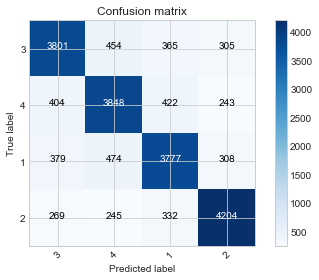

In [64]:
plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected,predicted), expected.unique(),
                       title='Confusion matrix')

In [65]:
accuracy_score(expected,predicted)

0.7881996974281392

In [66]:
dt_classifier.predict([[0,25,26,35,6]])[0]

1

In [67]:
cm = confusion_matrix(expected,predicted)


FP = cm.sum(axis=0) - np.diag(cm) 
FN = cm.sum(axis=1) - np.diag(cm)  
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

printRates(FP, "FP")
printRates(FN, "FN")
printRates(TP, "TP")
printRates(TN, "TN")

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
printRates(TPR, "TPR")

# Specificity or true negative rate
TNR = TN/(TN+FP) 
printRates(TNR, "TNR")

# Precision or positive predictive value
PPV = TP/(TP+FP)
printRates(PPV, "PPV")

# Negative predictive value
NPV = TN/(TN+FN)
printRates(NPV, "NPV")

# Fall out or false positive rate
FPR = FP/(FP+TN)
printRates(FPR, "FPR")

# False negative rate
FNR = FN/(TP+FN)
printRates(FNR, "FNR")

# False discovery rate
FDR = FP/(TP+FP)
printRates(FDR, "FDR")

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
printRates(ACC, "ACC")

FP for classes:
	class 1 = 1052.000000
	class 2 = 1173.000000
	class 3 = 1119.000000
	class 4 = 856.000000

FN for classes:
	class 1 = 1124.000000
	class 2 = 1069.000000
	class 3 = 1161.000000
	class 4 = 846.000000

TP for classes:
	class 1 = 3801.000000
	class 2 = 3848.000000
	class 3 = 3777.000000
	class 4 = 4204.000000

TN for classes:
	class 1 = 13853.000000
	class 2 = 13740.000000
	class 3 = 13773.000000
	class 4 = 13924.000000

TPR for classes:
	class 1 = 0.771777
	class 2 = 0.782591
	class 3 = 0.764885
	class 4 = 0.832475

TNR for classes:
	class 1 = 0.929420
	class 2 = 0.921344
	class 3 = 0.924859
	class 4 = 0.942084

PPV for classes:
	class 1 = 0.783227
	class 2 = 0.766381
	class 3 = 0.771446
	class 4 = 0.830830

NPV for classes:
	class 1 = 0.924952
	class 2 = 0.927814
	class 3 = 0.922258
	class 4 = 0.942722

FPR for classes:
	class 1 = 0.070580
	class 2 = 0.078656
	class 3 = 0.075141
	class 4 = 0.057916

FNR for classes:
	class 1 = 0.228223
	class 2 = 0.217409
	class 3 = 0.23

## ROC

Naive Bayes


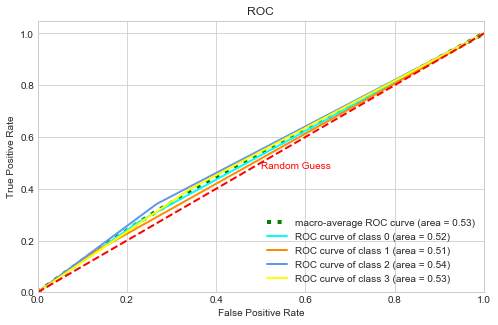

Decision Tree


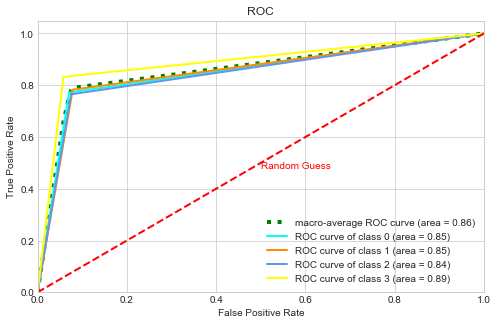

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
from scipy import interp
%matplotlib inline

def PlotRoc(classifier_type, pred,n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test2))[:, i], np.array(pd.get_dummies(pred))[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])


    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    lw=2
    plt.figure(figsize=(8,5))
    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='green', linestyle=':', linewidth=4)

    colors = ['aqua', 'darkorange', 'cornflowerblue', 'yellow']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.annotate('Random Guess',(.5,.48),color='red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()
    

print("Naive Bayes")
PlotRoc("Naive Bayes", pred,4)
print("Decision Tree")
PlotRoc("Decision Tree", predicted,4)

# The differences between the 2 Algorithems

#### As the results show, we see that the decision tree Algorithem is highly superior than the Naive Bayes Algorithm in this case.

#### The Naive Bayes Algorithem is based on the Bayes law in statistics. The Algorithm is considered to be much easier to implement than the decision tree, and generic for many different cases. It does however strongly relies on the fact the the different parameters are independent from each other - as in there is no correlation between them. In this case, there are a few parameters that have a strong binding between them (WeekDay and Checkin Date for example), and that is probably the reason why the decision algorithem gave us much better results.

#### The main disadvantege of the decision tree algorithem, is that it tends to overfit that data - as in the classifier has such a strong structure from the test data, that a new piece of information unknown to it might cause it to give incorrect results. this can be handled by pruning.